In [197]:
import geopandas as gpd

In [198]:
import pandas as pd

In [199]:
#import contextily as cx Need to download for basemap

In [200]:
import shapely.geometry #For spatial joins

In [201]:
#Make map frame
#Make variable for one featureclass
#Make variable for other featureclass
#Perform Spatial Join
#Determine number of points per sq.mi
#Assign concern level based on # of points

In [202]:
#Imports overall geodatabase
policeGDB = gpd.read_file(r'C:\Users\Kameron\Desktop\ArcGIS\Projects\AdvanceGIS\AdvanceGIS_Data\PoliceProject\PoliceData.gdb')

In [203]:
# Made variables for patrol areas and Graffiti points
patrolArea = gpd.read_file(r'C:\Users\Kameron\Desktop\ArcGIS\Projects\AdvanceGIS\AdvanceGIS_Data\PoliceProject\PoliceData.gdb', layer='PatrolZones')
incidentPoints = gpd.read_file(r'C:\Users\Kameron\Desktop\ArcGIS\Projects\AdvanceGIS\AdvanceGIS_Data\PoliceProject\PoliceData.gdb', layer='GraffitiIncidents')

In [204]:
#Test GDB
policeGDB

,COMMENTS,geometry
0,None,POINT (690453.853 5166304.333)
1,None,POINT (690402.500 5166098.921)
2,Back wall of commercial business,POINT (690373.156 5165959.534)
3,None,POINT (690820.660 5165842.156)
4,None,POINT (690872.013 5166117.261)
5,On stop sign,POINT (690908.694 5165379.980)
6,None,POINT (690857.341 5165446.005)
7,None,POINT (690835.332 5164881.122)
8,None,POINT (691143.450 5164837.105)
9,None,POINT (690611.580 5164983.828)


In [205]:
#Test for patrol Area
patrolArea

,INCIDENTS,PRIORITY,NAME,POPULATION,SHAPE_Length,SHAPE_Area,AreaSqMi,geometry
0,0,None,North Central,6477,8777.033636,3.880494e+06,1.498259,"MULTIPOLYGON (((690464.047 5167124.472, 690468..."
1,0,None,Northeast,5601,7440.428177,3.293690e+06,1.271694,"MULTIPOLYGON (((691594.121 5164834.759, 690795..."
2,0,None,Downtown,2833,5013.924984,1.432936e+06,0.553257,"MULTIPOLYGON (((690779.654 5163584.137, 690384..."
3,0,None,Eastside,7790,9206.485855,4.038758e+06,1.559364,"MULTIPOLYGON (((693865.461 5162964.666, 693072..."
4,0,None,Southeast,4998,10966.221591,6.668385e+06,2.574663,"MULTIPOLYGON (((691359.668 5162227.932, 691275..."
5,0,None,South Central,9527,11373.304385,7.716063e+06,2.979172,"MULTIPOLYGON (((691030.488 5162897.270, 691039..."
6,0,None,Central,7902,9539.703811,3.663411e+06,1.414443,"MULTIPOLYGON (((690779.654 5163584.137, 691030..."
7,0,None,Southwest,10224,11495.243750,6.681488e+06,2.579723,"MULTIPOLYGON (((688374.476 5162840.310, 688410..."
8,0,None,Northwest,12118,15289.916918,1.102094e+07,4.255185,"MULTIPOLYGON (((688889.416 5166528.990, 688977..."


In [206]:
#Test for incidents
incidentPoints

,COMMENTS,geometry
0,None,POINT (690453.853 5166304.333)
1,None,POINT (690402.500 5166098.921)
2,Back wall of commercial business,POINT (690373.156 5165959.534)
3,None,POINT (690820.660 5165842.156)
4,None,POINT (690872.013 5166117.261)
5,On stop sign,POINT (690908.694 5165379.980)
6,None,POINT (690857.341 5165446.005)
7,None,POINT (690835.332 5164881.122)
8,None,POINT (691143.450 5164837.105)
9,None,POINT (690611.580 5164983.828)


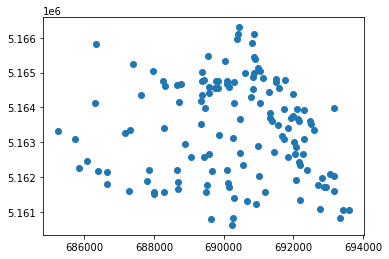

In [207]:
policeGDB.plot();

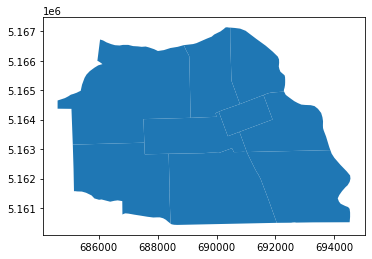

In [208]:
patrolArea.plot();

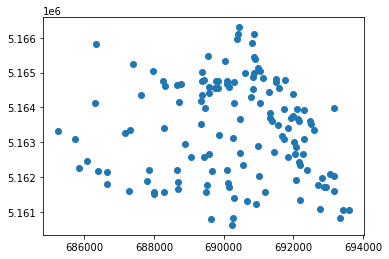

In [209]:
incidentPoints.plot();

In [210]:
print("Patrol Zones Coordinate System Check")
patrolArea.crs


Patrol Zones Coordinate System Check


<Projected CRS: EPSG:26910>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - 126°W to 120°W and NAD83 by country
- bounds: (-126.0, 30.54, -119.99, 81.8)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [211]:
print("Graffiti Incidents Coordinate System Check")
incidentPoints.crs

Graffiti Incidents Coordinate System Check


<Projected CRS: EPSG:26910>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - 126°W to 120°W and NAD83 by country
- bounds: (-126.0, 30.54, -119.99, 81.8)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [212]:
areaNames = patrolArea.set_index("NAME")

In [213]:
areaNames["area"] = areaNames.area

In [214]:
areaNames["area"]

NAME
North Central    3.880494e+06
Northeast        3.293690e+06
Downtown         1.432936e+06
Eastside         4.038758e+06
Southeast        6.668385e+06
South Central    7.716063e+06
Central          3.663411e+06
Southwest        6.681488e+06
Northwest        1.102094e+07
Name: area, dtype: float64

In [221]:
outputJoin = gpd.sjoin(incidentPoints, patrolArea , how="left", op='within')
outputJoin

,COMMENTS,geometry,index_right,INCIDENTS,PRIORITY,NAME,POPULATION,SHAPE_Length,SHAPE_Area,AreaSqMi
0,None,POINT (690453.853 5166304.333),0,0,None,North Central,6477,8777.033636,3.880494e+06,1.498259
1,None,POINT (690402.500 5166098.921),0,0,None,North Central,6477,8777.033636,3.880494e+06,1.498259
2,Back wall of commercial business,POINT (690373.156 5165959.534),0,0,None,North Central,6477,8777.033636,3.880494e+06,1.498259
3,None,POINT (690820.660 5165842.156),1,0,None,Northeast,5601,7440.428177,3.293690e+06,1.271694
4,None,POINT (690872.013 5166117.261),1,0,None,Northeast,5601,7440.428177,3.293690e+06,1.271694
5,On stop sign,POINT (690908.694 5165379.980),1,0,None,Northeast,5601,7440.428177,3.293690e+06,1.271694
6,None,POINT (690857.341 5165446.005),1,0,None,Northeast,5601,7440.428177,3.293690e+06,1.271694
7,None,POINT (690835.332 5164881.122),1,0,None,Northeast,5601,7440.428177,3.293690e+06,1.271694
8,None,POINT (691143.450 5164837.105),1,0,None,Northeast,5601,7440.428177,3.293690e+06,1.271694
9,None,POINT (690611.580 5164983.828),0,0,None,North Central,6477,8777.033636,3.880494e+06,1.498259


In [222]:
#count Points within Polygon
Graffiti_Counts = outputJoin.NAME.value_counts()
Graffiti_Counts

South Central    23
North Central    21
Southeast        21
Eastside         20
Northwest        13
Southwest        12
Northeast        10
Downtown         10
Central           6
Name: NAME, dtype: int64

In [223]:
#Perform unit conversion
unitConversion = outputJoin['SHAPE_Area'] = outputJoin['SHAPE_Area'].apply(lambda x: x*3.86102e-7)
unitConversion

0      1.498266
1      1.498266
2      1.498266
3      1.271700
4      1.271700
5      1.271700
6      1.271700
7      1.271700
8      1.271700
9      1.498266
10     0.553260
11     1.498266
12     1.498266
13     1.271700
14     1.271700
15     1.271700
16     0.553260
17     0.553260
18     0.553260
19     1.271700
20     1.559372
21     1.559372
22     0.553260
23     1.559372
24     1.559372
25     1.559372
26     0.553260
27     1.559372
28     1.559372
29     1.559372
30     1.559372
31     1.559372
32     1.559372
33     1.559372
34     1.559372
35     1.559372
36     1.559372
37     1.559372
38     1.559372
39     1.559372
40     0.553260
41     1.559372
42     1.559372
43     2.574677
44     2.574677
45     2.574677
46     2.574677
47     2.574677
48     2.574677
49     2.574677
50     2.574677
51     2.574677
52     2.574677
53     2.574677
54     2.574677
55     2.574677
56     2.574677
57     2.574677
58     2.574677
59     2.979187
60     2.979187
61     2.979187
62     2

In [224]:
# outputJoin['INCIDENTS'] = Graffiti_Counts
# outputJoin 
#Does not work. Im not sure how on how to remove the name

In [225]:
#Test Making Index which allows you to change specific rows that share this value
outputJoin["NAME"] == "Northeast"

0      False
1      False
2      False
3       True
4       True
5       True
6       True
7       True
8       True
9      False
10     False
11     False
12     False
13      True
14      True
15      True
16     False
17     False
18     False
19      True
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [177]:
# Test to ensure the index that was created correctly reassigns values
# outputJoin.loc[outputJoin["NAME"] == "Northeast", "INCIDENTS"] = 23
# outputJoin

,COMMENTS,geometry,index_right,INCIDENTS,PRIORITY,NAME,POPULATION,SHAPE_Length,SHAPE_Area,AreaSqMi,IncidentsPerArea,mi_sq
0,None,POINT (690453.853 5166304.333),0,21,LOW CONCERN,North Central,6477,8777.033636,3.880494e+06,1.498259,14.016199,1.498266
1,None,POINT (690402.500 5166098.921),0,21,LOW CONCERN,North Central,6477,8777.033636,3.880494e+06,1.498259,14.016199,1.498266
2,Back wall of commercial business,POINT (690373.156 5165959.534),0,21,LOW CONCERN,North Central,6477,8777.033636,3.880494e+06,1.498259,14.016199,1.498266
3,None,POINT (690820.660 5165842.156),1,23,LOW CONCERN,Northeast,5601,7440.428177,3.293690e+06,1.271694,7.863489,1.271700
4,None,POINT (690872.013 5166117.261),1,23,LOW CONCERN,Northeast,5601,7440.428177,3.293690e+06,1.271694,7.863489,1.271700
...,...,...,...,...,...,...,...,...,...,...,...,...
131,None,POINT (689559.028 5165464.781),0,21,LOW CONCERN,North Central,6477,8777.033636,3.880494e+06,1.498259,14.016199,1.498266
132,None,POINT (689633.983 5160802.392),5,23,LOW CONCERN,South Central,9527,11373.304385,7.716063e+06,2.979172,7.720226,2.979187
133,None,POINT (690244.651 5160625.387),5,23,LOW CONCERN,South Central,9527,11373.304385,7.716063e+06,2.979172,7.720226,2.979187
134,In alley,POINT (690271.202 5160828.943),5,23,LOW CONCERN,South Central,9527,11373.304385,7.716063e+06,2.979172,7.720226,2.979187


In [226]:
#Could not figure out how to update INCIDENTS with Graffiti_Counts, so I hard coded the values.
FilterGraffiti = outputJoin["NAME"] == "South Central"
outputJoin.loc[FilterGraffiti, "INCIDENTS"] = 23

#When the name within the geodataframe is the index, the values that the index matches will be updated for the Incidents column.
#I wanted to use an attribute join of join the values similarly to the arcpy Update cursor, but could not figure out how to update them with a similar process.
#Made a variable for the index from the previous block of code.

FilterGraffiti = outputJoin["NAME"] == "North Central"
outputJoin.loc[FilterGraffiti, "INCIDENTS"] = 21

FilterGraffiti = outputJoin["NAME"] == "Southeast"
outputJoin.loc[FilterGraffiti, "INCIDENTS"] = 21

FilterGraffiti = outputJoin["NAME"] == "Eastside"
outputJoin.loc[FilterGraffiti, "INCIDENTS"] = 20

FilterGraffiti = outputJoin["NAME"] == "Northwest"
outputJoin.loc[FilterGraffiti, "INCIDENTS"] = 13

FilterGraffiti = outputJoin["NAME"] == "Southwest"
outputJoin.loc[FilterGraffiti, "INCIDENTS"] = 12

FilterGraffiti = outputJoin["NAME"] == "Northeast"
outputJoin.loc[FilterGraffiti, "INCIDENTS"] = 10

FilterGraffiti = outputJoin["NAME"] == "Downtown"
outputJoin.loc[FilterGraffiti, "INCIDENTS"] = 10

FilterGraffiti = outputJoin["NAME"] == "Southwest"
outputJoin.loc[FilterGraffiti, "INCIDENTS"] = 12

FilterGraffiti = outputJoin["NAME"] == "Central"
outputJoin.loc[FilterGraffiti, "INCIDENTS"] = 6
outputJoin


,COMMENTS,geometry,index_right,INCIDENTS,PRIORITY,NAME,POPULATION,SHAPE_Length,SHAPE_Area,AreaSqMi
0,None,POINT (690453.853 5166304.333),0,21,None,North Central,6477,8777.033636,1.498266,1.498259
1,None,POINT (690402.500 5166098.921),0,21,None,North Central,6477,8777.033636,1.498266,1.498259
2,Back wall of commercial business,POINT (690373.156 5165959.534),0,21,None,North Central,6477,8777.033636,1.498266,1.498259
3,None,POINT (690820.660 5165842.156),1,10,None,Northeast,5601,7440.428177,1.271700,1.271694
4,None,POINT (690872.013 5166117.261),1,10,None,Northeast,5601,7440.428177,1.271700,1.271694
5,On stop sign,POINT (690908.694 5165379.980),1,10,None,Northeast,5601,7440.428177,1.271700,1.271694
6,None,POINT (690857.341 5165446.005),1,10,None,Northeast,5601,7440.428177,1.271700,1.271694
7,None,POINT (690835.332 5164881.122),1,10,None,Northeast,5601,7440.428177,1.271700,1.271694
8,None,POINT (691143.450 5164837.105),1,10,None,Northeast,5601,7440.428177,1.271700,1.271694
9,None,POINT (690611.580 5164983.828),0,21,None,North Central,6477,8777.033636,1.498266,1.498259


In [227]:
#Make new column for graffiti incidents per sq.mi
graffitiPerArea = outputJoin["INCIDENTS"]/unitConversion
graffitiPerArea
outputJoin['IncidentsPerArea'] = graffitiPerArea
outputJoin

,COMMENTS,geometry,index_right,INCIDENTS,PRIORITY,NAME,POPULATION,SHAPE_Length,SHAPE_Area,AreaSqMi,IncidentsPerArea
0,None,POINT (690453.853 5166304.333),0,21,None,North Central,6477,8777.033636,1.498266,1.498259,14.016199
1,None,POINT (690402.500 5166098.921),0,21,None,North Central,6477,8777.033636,1.498266,1.498259,14.016199
2,Back wall of commercial business,POINT (690373.156 5165959.534),0,21,None,North Central,6477,8777.033636,1.498266,1.498259,14.016199
3,None,POINT (690820.660 5165842.156),1,10,None,Northeast,5601,7440.428177,1.271700,1.271694,7.863489
4,None,POINT (690872.013 5166117.261),1,10,None,Northeast,5601,7440.428177,1.271700,1.271694,7.863489
5,On stop sign,POINT (690908.694 5165379.980),1,10,None,Northeast,5601,7440.428177,1.271700,1.271694,7.863489
6,None,POINT (690857.341 5165446.005),1,10,None,Northeast,5601,7440.428177,1.271700,1.271694,7.863489
7,None,POINT (690835.332 5164881.122),1,10,None,Northeast,5601,7440.428177,1.271700,1.271694,7.863489
8,None,POINT (691143.450 5164837.105),1,10,None,Northeast,5601,7440.428177,1.271700,1.271694,7.863489
9,None,POINT (690611.580 5164983.828),0,21,None,North Central,6477,8777.033636,1.498266,1.498259,14.016199


In [228]:
#Makes a new column for the area in square miles.
outputJoin['mi_sq'] = unitConversion


In [230]:
#Wanted to expand all rows to do hard coding
pd.set_option("display.max_rows", None)
outputJoin

,COMMENTS,geometry,index_right,INCIDENTS,PRIORITY,NAME,POPULATION,SHAPE_Length,SHAPE_Area,AreaSqMi,IncidentsPerArea,mi_sq
0,None,POINT (690453.853 5166304.333),0,21,None,North Central,6477,8777.033636,1.498266,1.498259,14.016199,1.498266
1,None,POINT (690402.500 5166098.921),0,21,None,North Central,6477,8777.033636,1.498266,1.498259,14.016199,1.498266
2,Back wall of commercial business,POINT (690373.156 5165959.534),0,21,None,North Central,6477,8777.033636,1.498266,1.498259,14.016199,1.498266
3,None,POINT (690820.660 5165842.156),1,10,None,Northeast,5601,7440.428177,1.271700,1.271694,7.863489,1.271700
4,None,POINT (690872.013 5166117.261),1,10,None,Northeast,5601,7440.428177,1.271700,1.271694,7.863489,1.271700
5,On stop sign,POINT (690908.694 5165379.980),1,10,None,Northeast,5601,7440.428177,1.271700,1.271694,7.863489,1.271700
6,None,POINT (690857.341 5165446.005),1,10,None,Northeast,5601,7440.428177,1.271700,1.271694,7.863489,1.271700
7,None,POINT (690835.332 5164881.122),1,10,None,Northeast,5601,7440.428177,1.271700,1.271694,7.863489,1.271700
8,None,POINT (691143.450 5164837.105),1,10,None,Northeast,5601,7440.428177,1.271700,1.271694,7.863489,1.271700
9,None,POINT (690611.580 5164983.828),0,21,None,North Central,6477,8777.033636,1.498266,1.498259,14.016199,1.498266


In [231]:
#Update Priorities
#•	TOP CONCERN—15 or more incidents per square mile
# •	HIGH CONCERN— At least 12 but less than 15 incidents per square mile
# •	SOME CONCERN— At least 6 but less than 12 incidents per square mile
# •	LOW CONCERN—Fewer than 6 incidents per square mile
outputJoin['IncidentsPerArea'] = graffitiPerArea
outputJoin

concern = outputJoin["IncidentsPerArea"] >= 15
outputJoin.loc[concern, "PRIORITY"] = "TOP_CONCERN"

# concern = outputJoin["IncidentsPerArea"] <=12
# outputJoin.loc[concern, "PRIORITY"] = "TOP_CONCERN"

concern = outputJoin["IncidentsPerArea"] < 6
outputJoin.loc[concern, "PRIORITY"] = "LOW CONCERN"
outputJoin
#Not sure how to make a range of values to change the priority

areaPriority = outputJoin["NAME"] == "North Central"
outputJoin.loc[areaPriority, "PRIORITY"] = "HIGH_CONCERN"

areaPriority = outputJoin["NAME"] == "Eastside"
outputJoin.loc[areaPriority, "PRIORITY"] = "HIGH_CONCERN"

areaPriority = outputJoin["NAME"] == "Northeast"
outputJoin.loc[areaPriority, "PRIORITY"] = "SOME_CONCERN"

areaPriority = outputJoin["NAME"] == "Southeast"
outputJoin.loc[areaPriority, "PRIORITY"] = "SOME_CONCERN"

areaPriority = outputJoin["NAME"] == "South Central"
outputJoin.loc[areaPriority, "PRIORITY"] = "SOME_CONCERN"

# areaPriority = outputJoin["NAME"] == "Central"
# outputJoin.loc[areaPriority, "PRIORITY"] = "LOW_CONCERN"

# areaPriority = outputJoin["NAME"] == "Northwest"
# outputJoin.loc[areaPriority, "PRIORITY"] = "LOW_CONCERN"

In [232]:
outputJoin

,COMMENTS,geometry,index_right,INCIDENTS,PRIORITY,NAME,POPULATION,SHAPE_Length,SHAPE_Area,AreaSqMi,IncidentsPerArea,mi_sq
0,None,POINT (690453.853 5166304.333),0,21,HIGH_CONCERN,North Central,6477,8777.033636,1.498266,1.498259,14.016199,1.498266
1,None,POINT (690402.500 5166098.921),0,21,HIGH_CONCERN,North Central,6477,8777.033636,1.498266,1.498259,14.016199,1.498266
2,Back wall of commercial business,POINT (690373.156 5165959.534),0,21,HIGH_CONCERN,North Central,6477,8777.033636,1.498266,1.498259,14.016199,1.498266
3,None,POINT (690820.660 5165842.156),1,10,SOME_CONCERN,Northeast,5601,7440.428177,1.271700,1.271694,7.863489,1.271700
4,None,POINT (690872.013 5166117.261),1,10,SOME_CONCERN,Northeast,5601,7440.428177,1.271700,1.271694,7.863489,1.271700
5,On stop sign,POINT (690908.694 5165379.980),1,10,SOME_CONCERN,Northeast,5601,7440.428177,1.271700,1.271694,7.863489,1.271700
6,None,POINT (690857.341 5165446.005),1,10,SOME_CONCERN,Northeast,5601,7440.428177,1.271700,1.271694,7.863489,1.271700
7,None,POINT (690835.332 5164881.122),1,10,SOME_CONCERN,Northeast,5601,7440.428177,1.271700,1.271694,7.863489,1.271700
8,None,POINT (691143.450 5164837.105),1,10,SOME_CONCERN,Northeast,5601,7440.428177,1.271700,1.271694,7.863489,1.271700
9,None,POINT (690611.580 5164983.828),0,21,HIGH_CONCERN,North Central,6477,8777.033636,1.498266,1.498259,14.016199,1.498266
